In [22]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.api import qqplot
%matplotlib inline

In [3]:
df = pd.read_csv("sunspots.csv")

In [5]:
df.head(10)

,YEAR,SUNACTIVITY
0,1700,5.0
1,1701,11.0
2,1702,16.0
3,1703,23.0
4,1704,36.0
5,1705,58.0
6,1706,29.0
7,1707,20.0
8,1708,10.0
9,1709,8.0


In [6]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



In [10]:
df


,YEAR,SUNACTIVITY
1700-12-31,1700,5.0
1701-12-31,1701,11.0
1702-12-31,1702,16.0
1703-12-31,1703,23.0
1704-12-31,1704,36.0
...,...,...
2004-12-31,2004,40.4
2005-12-31,2005,29.8
2006-12-31,2006,15.2
2007-12-31,2007,7.5


In [13]:
df.index = pd.Index(sm.tsa.datetools.dates_from_range('1700','2008'))
del df["YEAR"]

In [14]:
df

,SUNACTIVITY
1700-12-31,5.0
1701-12-31,11.0
1702-12-31,16.0
1703-12-31,23.0
1704-12-31,36.0
...,...
2004-12-31,40.4
2005-12-31,29.8
2006-12-31,15.2
2007-12-31,7.5


<AxesSubplot:>

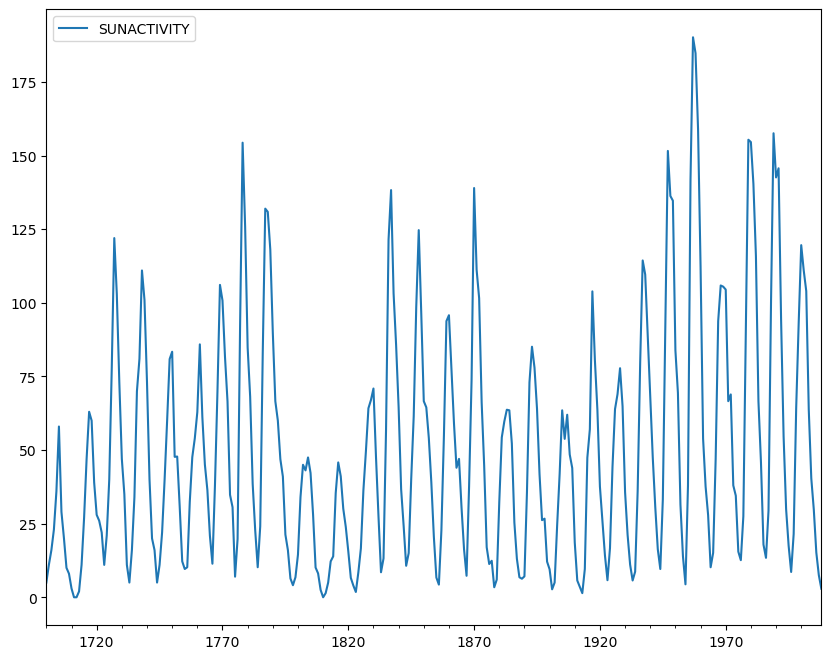

In [17]:
df.plot(figsize= (10,8))

In [18]:
sm.stats.durbin_watson(df)

array([0.13952893])

C:\Users\Vaibhav\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


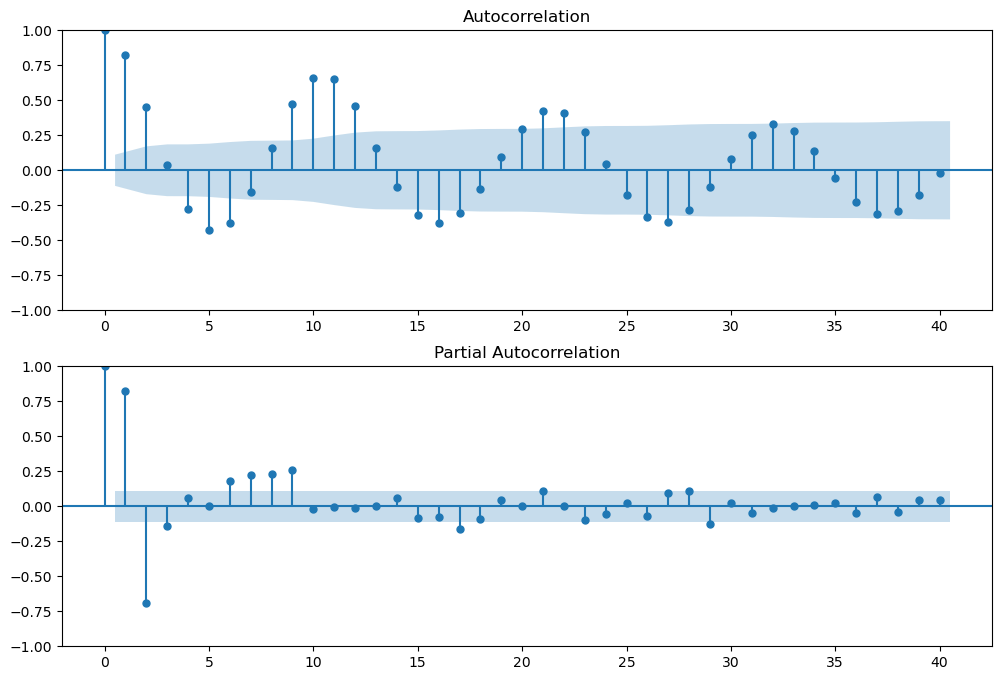

In [19]:
# show plots in the notebook
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=40, ax=ax2)

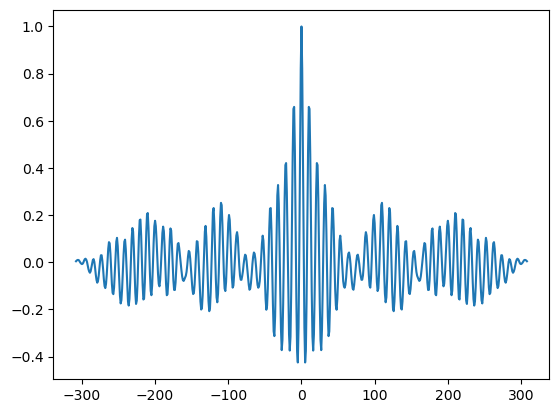

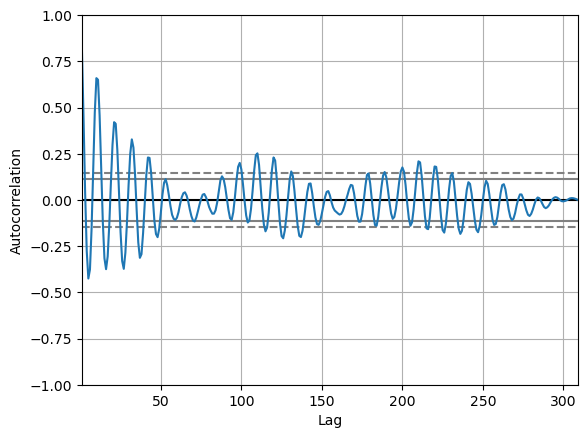

In [23]:
df['SUNACTIVITY_2'] = df['SUNACTIVITY']
df['SUNACTIVITY_2'] = (df['SUNACTIVITY_2'] - df['SUNACTIVITY_2'].mean()) / (df['SUNACTIVITY_2'].std())
plt.acorr(df['SUNACTIVITY_2'],maxlags = len(df['SUNACTIVITY_2']) -1, linestyle = "solid", usevlines = False, marker='')
plt.show()
autocorrelation_plot(df['SUNACTIVITY'])
plt.show()

In [129]:
arma_mod20 = sm.tsa.ARIMA(df["SUNACTIVITY"],order=(2,0,1)).fit()
print(arma_mod20.params)

const      49.751962
ar.L1       1.470742
ar.L2      -0.755122
ma.L1      -0.153695
sigma2    270.876666
dtype: float64


C:\Users\Vaibhav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\Vaibhav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\Vaibhav\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)


In [130]:
print(arma_mod20.aic, arma_mod20.bic, arma_mod20.hqic)

2620.277192552092 2638.943898936581 2627.7401773586494


In [131]:
sm.stats.durbin_watson(arma_mod20.resid.values)

1.990337430995765

The Durbin-Watson test shows no autocorrelation.


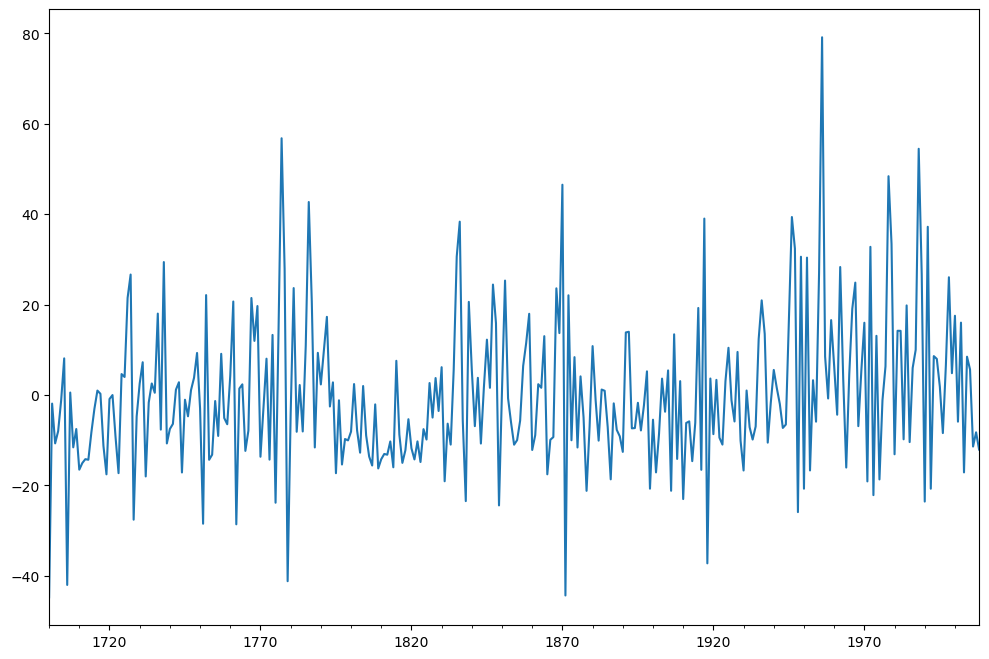

In [132]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax = arma_mod20.resid.plot(ax=ax)

In [133]:
resid20 = arma_mod20.resid
stats.normaltest(resid20)

NormaltestResult(statistic=48.54980291926902, pvalue=2.8677695383935964e-11)

In [134]:
len(resid20)

309

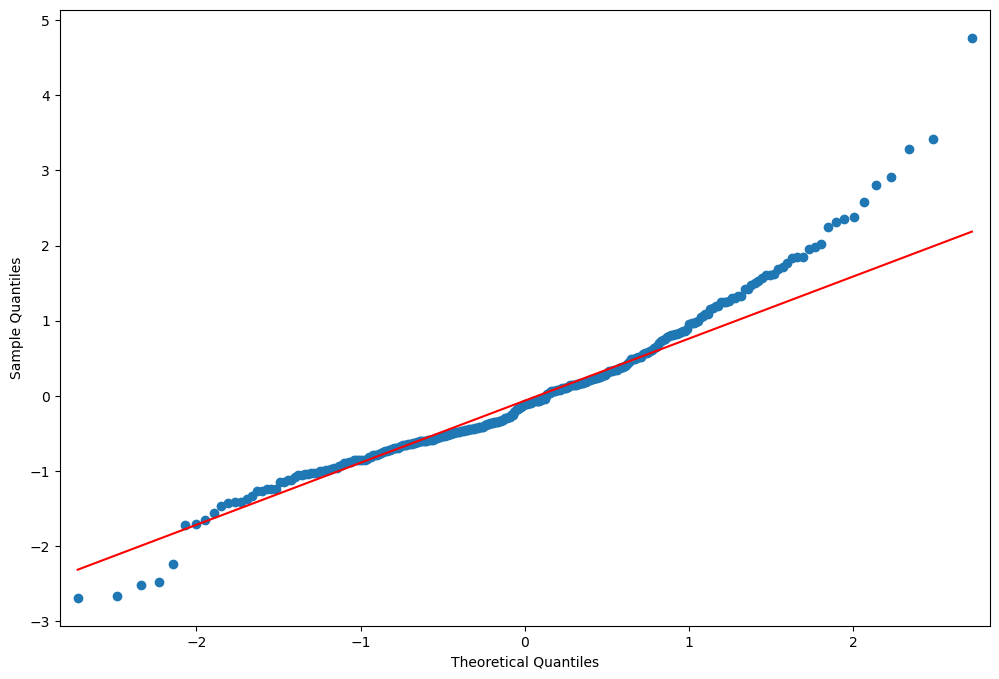

In [135]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid20, line='q', ax=ax, fit=True)

C:\Users\Vaibhav\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


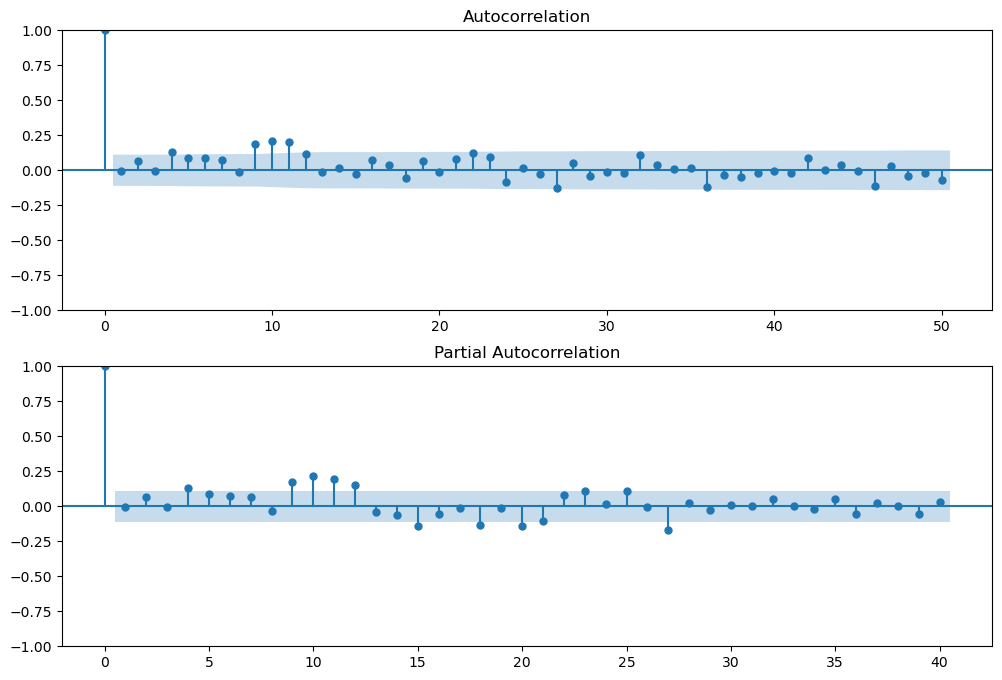

In [136]:
%matplotlib inline
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid20.values.squeeze(), lags=50, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid20, lags=40, ax=ax2)

In [137]:
r,q,p = sm.tsa.acf(resid20.values.squeeze(),qstat=True)


In [138]:
len(q),len(r),len(p)

(24, 25, 24)

In [139]:
data = np.c_[range(1,25), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC          Q      Prob(>Q)
lag                                    
1.0  -0.007721   0.018601  8.915153e-01
2.0   0.067879   1.460901  4.816920e-01
3.0  -0.007968   1.480841  6.866993e-01
4.0   0.131279   6.910996  1.406671e-01
5.0   0.084484   9.167264  1.025757e-01
6.0   0.086888  11.561635  7.249384e-02
7.0   0.070620  13.148581  6.856993e-02
8.0  -0.013210  13.204296  1.050111e-01
9.0   0.190581  24.839052  3.154474e-03
10.0  0.210382  39.064408  2.473759e-05
11.0  0.200231  51.993397  2.733950e-07
12.0  0.119028  56.577594  9.420200e-08
13.0 -0.013979  56.641033  2.077433e-07
14.0  0.017750  56.743671  4.332760e-07
15.0 -0.029076  57.020008  8.142726e-07
16.0  0.076468  58.937856  7.894268e-07
17.0  0.039419  59.449235  1.295184e-06
18.0 -0.052852  60.371697  1.781534e-06
19.0  0.066095  61.819351  1.987916e-06
20.0 -0.010268  61.854406  3.663862e-06
21.0  0.077882  63.878354  3.249171e-06
22.0  0.121014  68.781897  1.026956e-06
23.0  0.095280  71.832281  6.319216e-07


In [140]:
predict_sunspots20 = arma_mod20.predict('1990', '2020', dynamic=True)
print(predict_sunspots20)

1990-12-31    166.177481
1991-12-31    139.545424
1992-12-31     93.899486
1993-12-31     46.876541
1994-12-31     12.186178
1995-12-31     -3.326327
1996-12-31      0.054246
1997-12-31     16.740035
1998-12-31     38.727783
1999-12-31     58.466280
2000-12-31     70.893081
2001-12-31     74.264721
2002-12-31     69.839780
2003-12-31     60.785832
2004-12-31     50.811181
2005-12-31     42.977878
2006-12-31     38.989191
2007-12-31     39.037963
2008-12-31     42.121640
2009-12-31     46.620106
2010-12-31     50.907635
2011-12-31     53.816594
2012-12-31     54.857313
2013-12-31     54.191323
2014-12-31     52.425953
2015-12-31     50.332453
2016-12-31     48.586524
2017-12-31     47.599562
2018-12-31     47.466384
2019-12-31     48.015792
2020-12-31     48.924395
Freq: A-DEC, Name: predicted_mean, dtype: float64


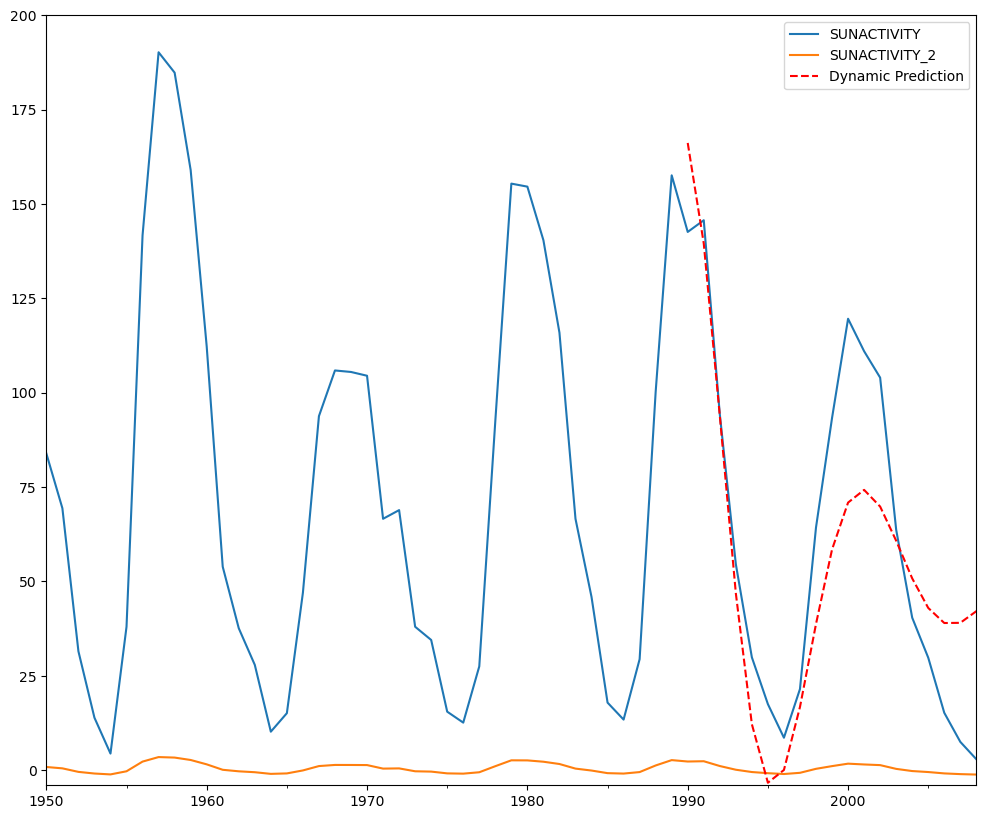

In [141]:
ax = df.loc['1950':].plot(figsize=(12,10))
ax = predict_sunspots20.plot(ax=ax, style='r--', label='Dynamic Prediction');
ax.legend();
ax.axis((-20.0, 38.0, -4.0, 200.0));

In [142]:
def mean_forecast_err(y, yhat):
    return y.sub(yhat).mean()

def mean_absolute_err(y, yhat):
    return np.mean((np.abs(y.sub(yhat).mean()) / yhat))

In [143]:
print("MFE = ", mean_forecast_err(df.SUNACTIVITY, predict_sunspots20))
print("MAE = ", mean_absolute_err(df.SUNACTIVITY, predict_sunspots20))

MFE =  5.649031809391105
MAE =  3.4220948928023174
